#Data Preprocessing Practical
**Objective**: Familiarize yourself with common data preprocessing steps using a housing dataset

1. Load the housing dataset provided.
2. How many rows and columns are in this dataset?
3. Describe the dataset.
4. What do you observe about the distribution of different features and target variable?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
# Load the housing dataset
df_housing = pd.read_csv('housing_data.csv')
df_housing.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
# Describe the dataset
print(df_housing.describe())

       square_feet  num_bedrooms  num_bathrooms     lot_size  year_built  \
count   951.000000   1000.000000    1000.000000   952.000000  1000.00000   
mean   2990.284963      3.032000       2.547000  5464.286765  1971.50200   
std    1185.063302      1.430742       1.138898  2538.746894    29.11071   
min     803.000000      1.000000       1.000000  1006.000000  1920.00000   
25%    1968.000000      2.000000       2.000000  3253.250000  1947.00000   
50%    2998.000000      3.000000       3.000000  5317.000000  1973.00000   
75%    3981.500000      4.000000       4.000000  7588.250000  1997.00000   
max    4999.000000      5.000000       4.000000  9988.000000  2022.00000   

               price  
count    1000.000000  
mean   527111.146000  
std    275876.032045  
min     50215.000000  
25%    297988.250000  
50%    521355.000000  
75%    771865.000000  
max    999520.000000  


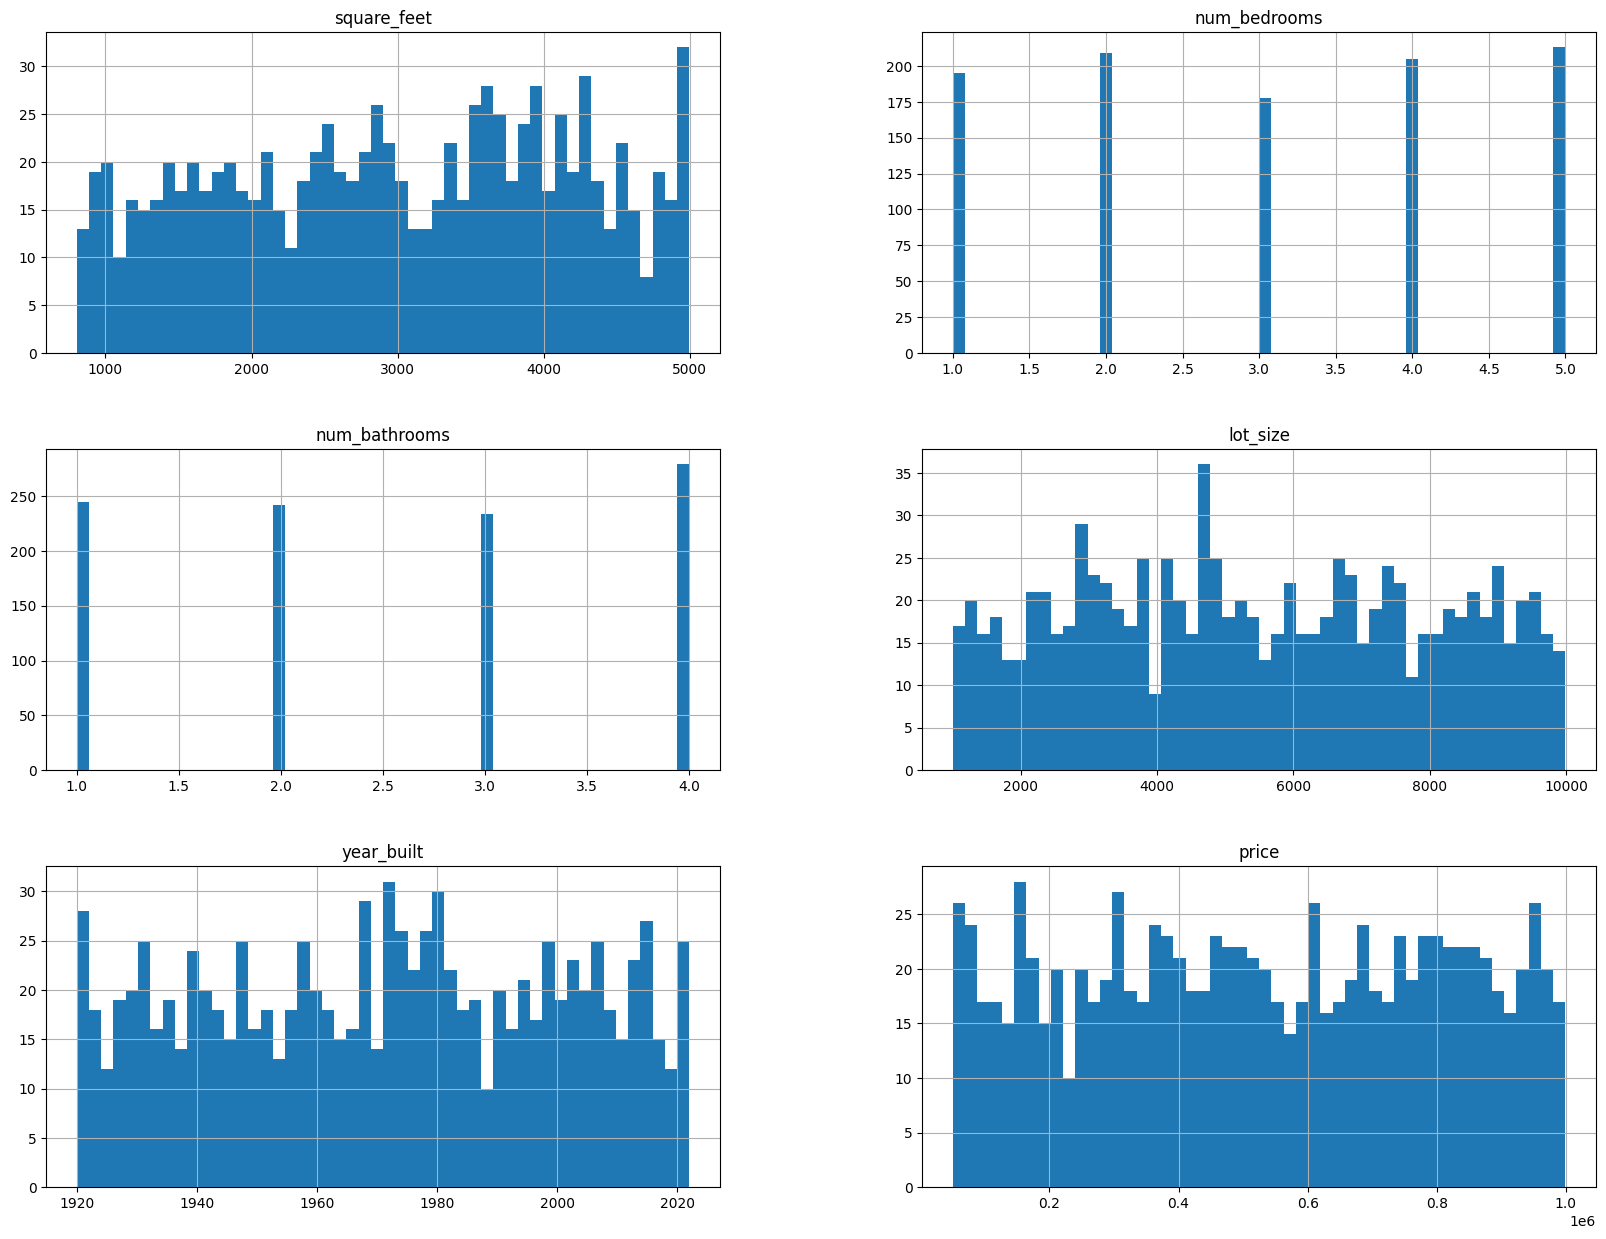

In [23]:
# Visualization:
df_housing.hist(bins=50, figsize=(20,15))
plt.show()

#2. Handling Missing Values

Missing data is a common issue in real-world datasets. It's crucial to address this because many machine learning models cannot handle missing values.

Missing values per column:
square_feet      49
num_bedrooms      0
num_bathrooms     0
lot_size         48
year_built        0
neighborhood      0
price             0
dtype: int64

Percentage of missing values per column:
square_feet      4.9
num_bedrooms     0.0
num_bathrooms    0.0
lot_size         4.8
year_built       0.0
neighborhood     0.0
price            0.0
dtype: float64


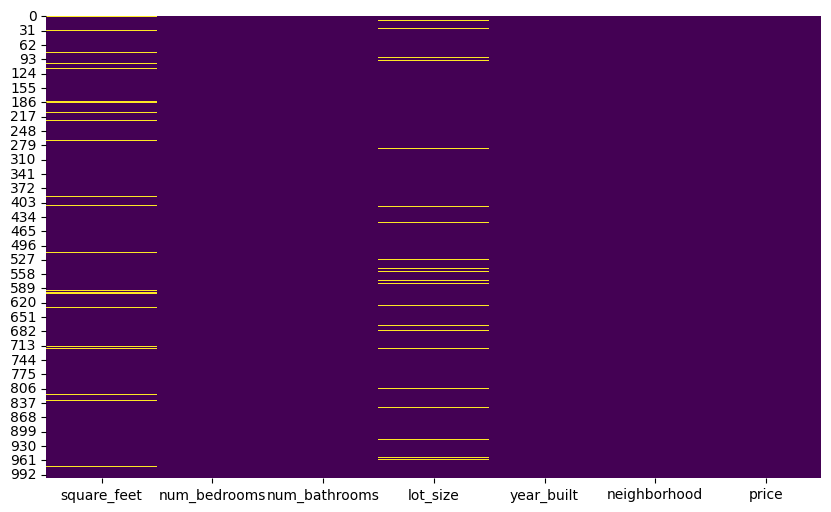

In [24]:
# Check for missing values in each column
missing_values = df_housing.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Check percentage of missing values for each column
missing_percentage = (df_housing.isnull().sum() / len(df_housing)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)

# visualize the missing values

plt.figure(figsize=(10,6))
sns.heatmap(df_housing.isnull(), cbar=False, cmap='viridis')
plt.show()

In [25]:
# Fill missing values with mean for 'square_feet' and median for 'lot_size'
df_housing['square_feet'].fillna(df_housing['square_feet'].mean(), inplace=True)
df_housing['lot_size'].fillna(df_housing['lot_size'].median(), inplace=True)

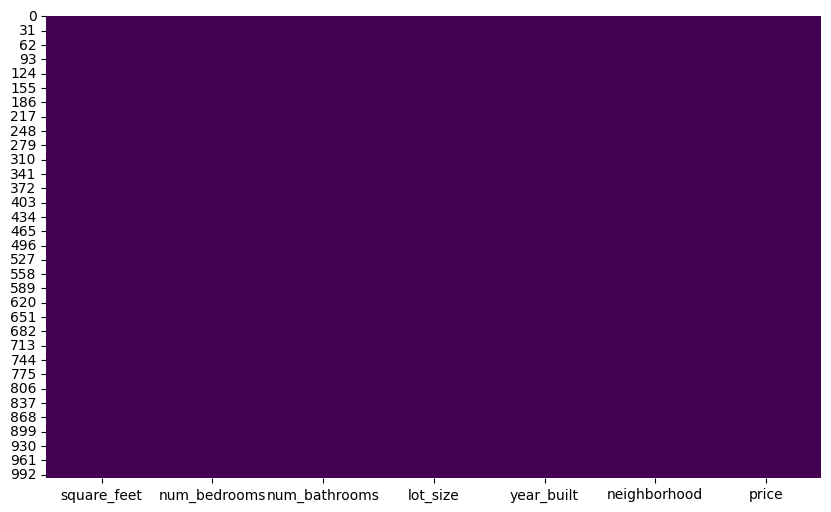

In [26]:
# Visualization after filling in the missing values:
plt.figure(figsize=(10,6))
sns.heatmap(df_housing.isnull(), cbar=False, cmap='viridis')
plt.show()

#3. Data Transformation

Different features might be on different scales. Some algorithms, like K-means clustering or logistic regression, perform better when all features have a similar scale

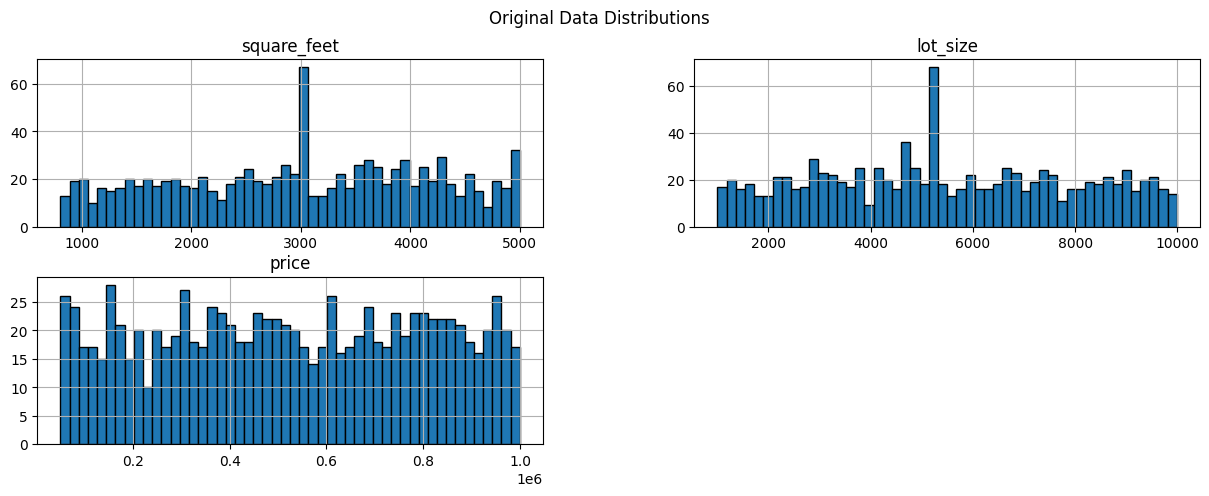

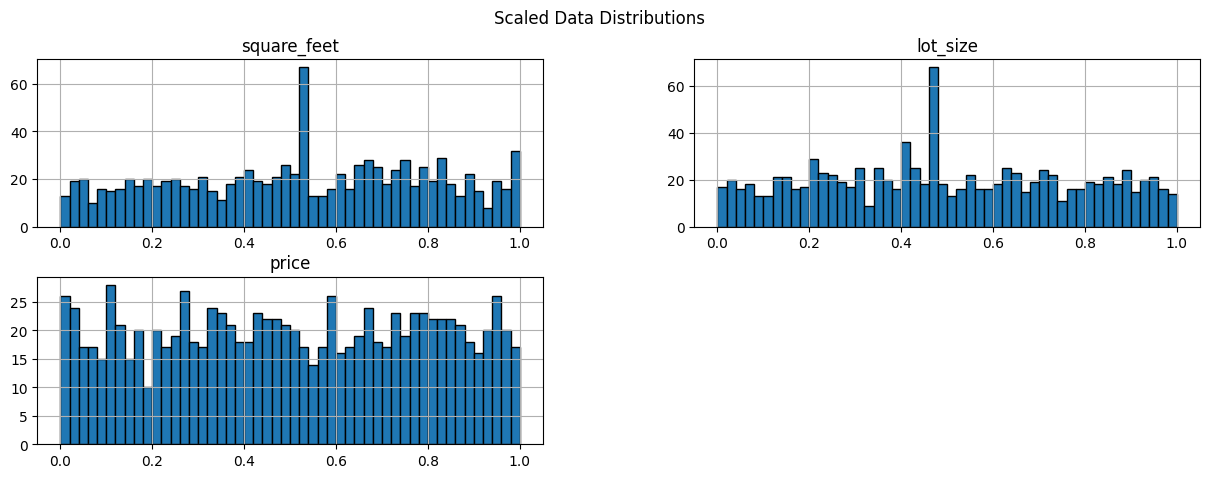

In [27]:
# Original Data Visualization
df_housing[['square_feet', 'lot_size', 'price']].hist(bins=50, figsize=(15,5), edgecolor='black')
plt.suptitle("Original Data Distributions")
plt.show()

# Data Scaling and Transformation
scaler = MinMaxScaler()
df_housing[['square_feet', 'lot_size', 'price']] = scaler.fit_transform(df_housing[['square_feet', 'lot_size', 'price']])

# Scaled Data Visualization
df_housing[['square_feet', 'lot_size', 'price']].hist(bins=50, figsize=(15,5), edgecolor='black')
plt.suptitle("Scaled Data Distributions")
plt.show()

#4. Encoding Categorical Data

Machine learning models require numerical input, so categorical data must be converted. One common way is one-hot encoding.

In [28]:
# One-hot encoding
df_housing_encoded = pd.get_dummies(df_housing, columns=['neighborhood'])


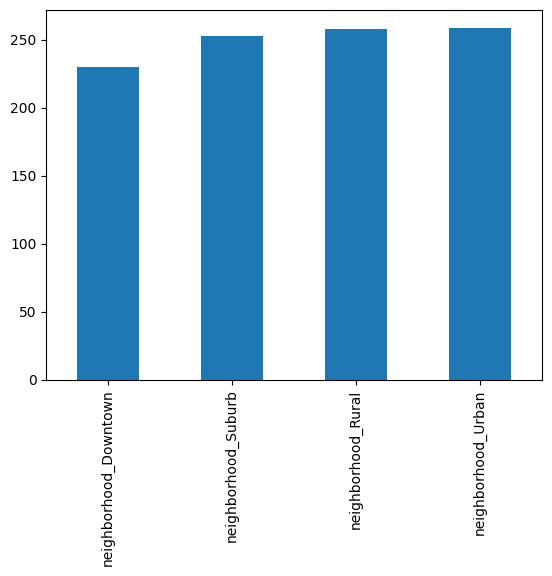

In [29]:
df_housing_encoded[['neighborhood_Downtown', 'neighborhood_Suburb', 'neighborhood_Rural', 'neighborhood_Urban']].sum().plot(kind='bar')
plt.show()

#5. Feature Selection

Not all features may be helpful. Sometimes, features might be highly correlated with each other, which can cause multicollinearity in linear models.

In [12]:
correlation_matrix = df_housing_encoded.corr()
print(correlation_matrix)

                       Unnamed: 0  square_feet  num_bedrooms  num_bathrooms  \
Unnamed: 0               1.000000     0.009415      0.052227       0.003099   
square_feet              0.009415     1.000000     -0.048406       0.008262   
num_bedrooms             0.052227    -0.048406      1.000000      -0.069727   
num_bathrooms            0.003099     0.008262     -0.069727       1.000000   
lot_size                 0.029900    -0.038902      0.001824      -0.024431   
year_built               0.051092     0.000494     -0.015287       0.018762   
price                    0.068717     0.020405     -0.015512       0.019894   
neighborhood_Downtown    0.002725    -0.040172      0.022665       0.023359   
neighborhood_Rural      -0.010475     0.023654     -0.022785      -0.018323   
neighborhood_Suburb     -0.007160    -0.043161     -0.011414       0.013355   
neighborhood_Urban       0.014949     0.057796      0.012310      -0.017392   

                       lot_size  year_built     pri

Explanation: We calculated the correlation matrix to observe how features relate to each other. One can then decide to remove features based on high correlations or based on their correlation with the target variable

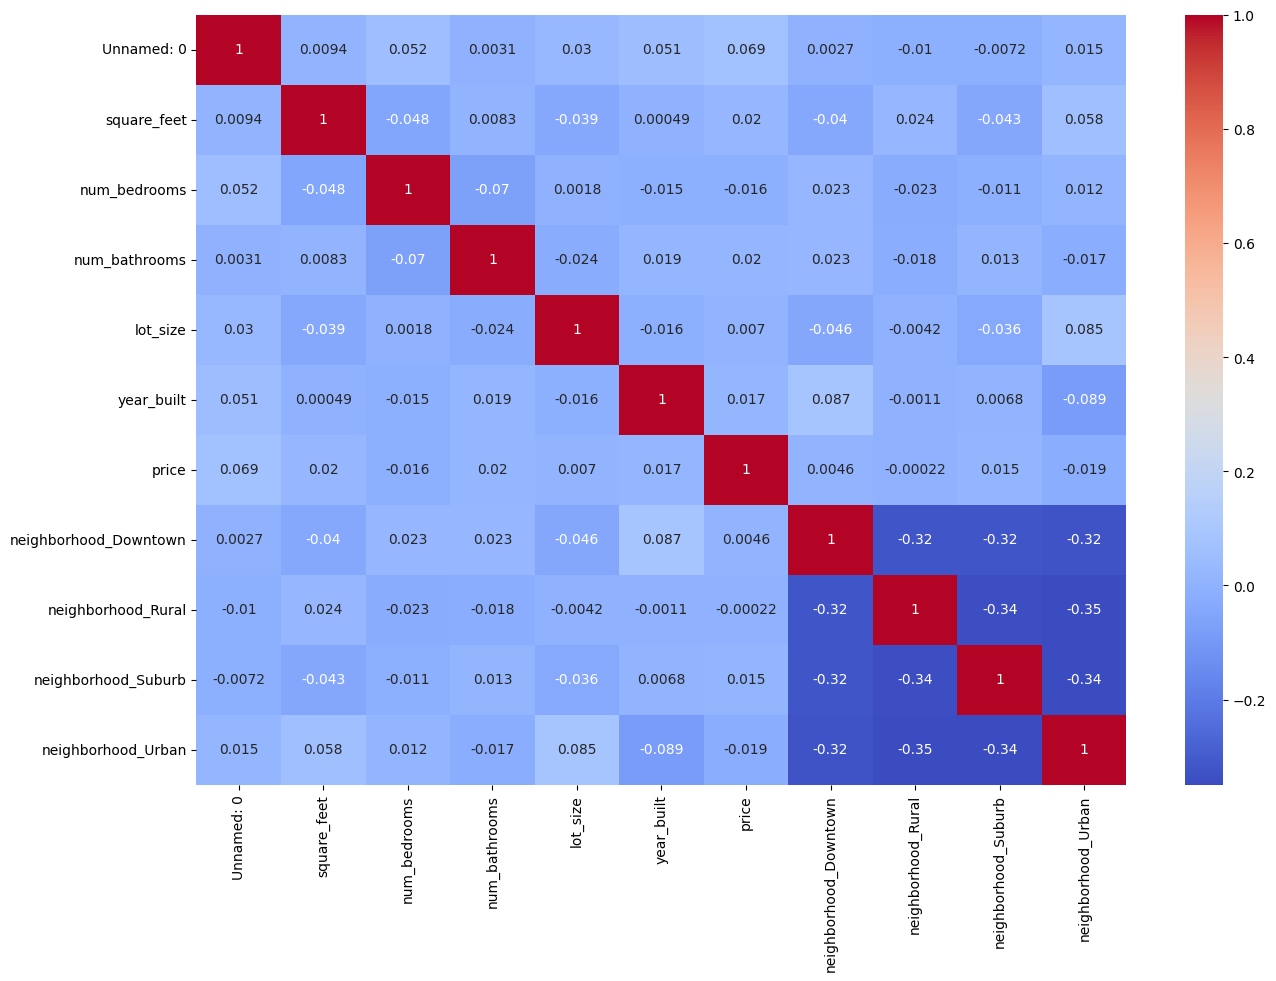

In [ ]:
#Visualize the correlation matrix:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#6. Splitting Data into Train and Test Sets

To evaluate our model's performance, we need to train it on one set of data and test it on another.

In [13]:
from sklearn.model_selection import train_test_split

X = df_housing_encoded.drop('price', axis=1)
y = df_housing_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


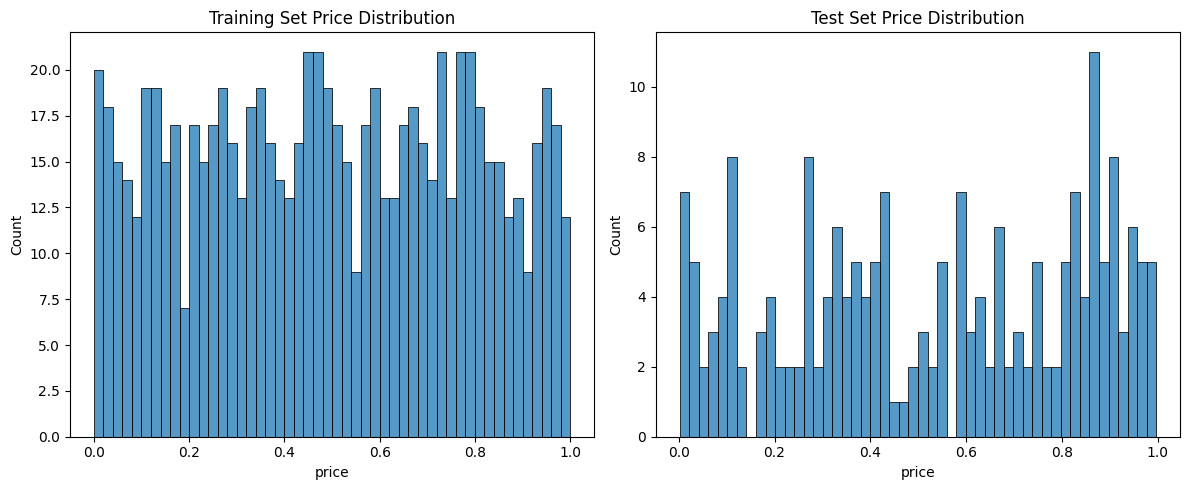

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=50)
plt.title('Training Set Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(y_test, bins=50)
plt.title('Test Set Price Distribution')

plt.tight_layout()
plt.show()